In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('C:/Users/Naman/Downloads/naman python/ana lytics/loan prediction/Black Friday Sales/train.csv')
df.head(2)   

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
df['Marital_Status']=df['Marital_Status'].astype('object')
df['Occupation']=df['Occupation'].astype('object')
df['Product_Category_1']=df['Product_Category_1'].astype('object')
df['Product_Category_2']=df['Product_Category_2'].astype('object')
df['Product_Category_3']=df['Product_Category_3'].astype('object')

In [6]:
df.select_dtypes(include=np.number).columns

Index(['User_ID', 'Purchase'], dtype='object')

In [7]:
df.select_dtypes(exclude=np.number).columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [8]:
df.isnull().sum()/len(df)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

(array([1, 2]), [Text(1, 0, 'User_ID'), Text(2, 0, 'Purchase')])

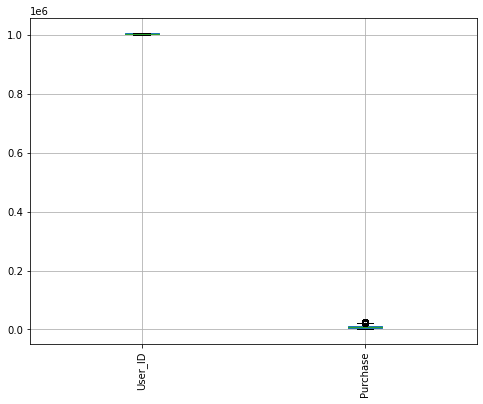

In [9]:
plt.figure(figsize=[8,6])
df.boxplot()
plt.xticks(rotation=90)

In [10]:
df.isnull().sum()/len(df)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [11]:
df.shape

(550068, 12)

# Bi variate Analysis Of Categorical With Target 

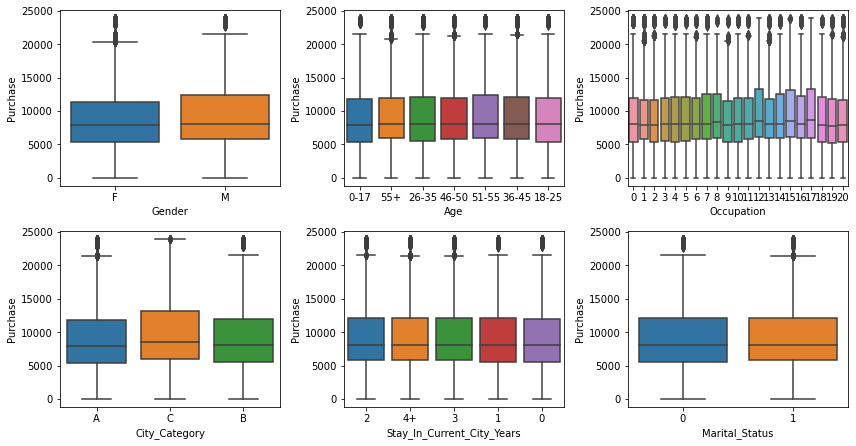

In [12]:
col=['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status']
a=4
b=3
c=1
plt.figure(figsize=[12,12])
for i in col:
    plt.subplot(a,b,c)
    sns.boxplot(x=df[i],y=df['Purchase'])
    c+=1

plt.tight_layout()
plt.show()

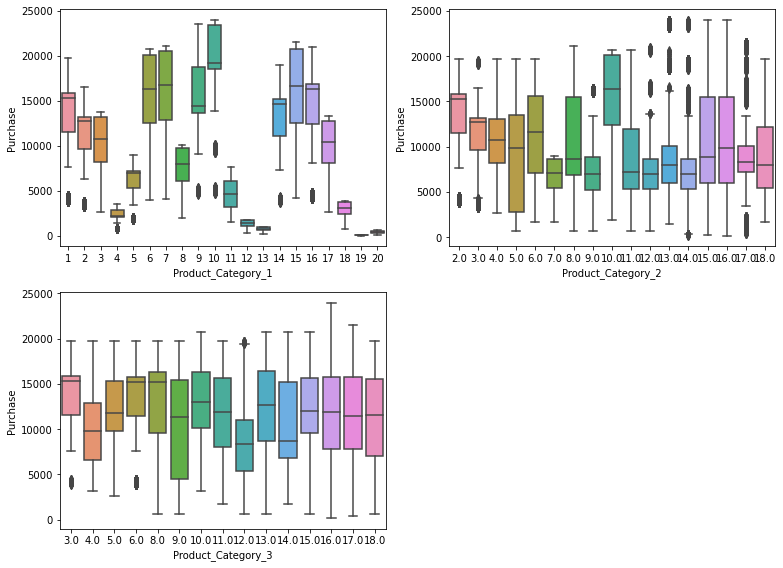

In [13]:
col=['Product_Category_1',
       'Product_Category_2','Product_Category_3']
a=2
b=2
c=1
plt.figure(figsize=[11,8])
for i in col:
    plt.subplot(a,b,c)
    sns.boxplot(x=df[i],y=df['Purchase'])
    c+=1

plt.tight_layout()
plt.show()

In [14]:
df['Product_Category_1'].unique()

array([3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 16, 18, 10, 17, 9, 20,
       19], dtype=object)

In [15]:
df['Product_Category_2'].unique()

array([nan, 6.0, 14.0, 2.0, 8.0, 15.0, 16.0, 11.0, 5.0, 3.0, 4.0, 12.0,
       9.0, 10.0, 17.0, 13.0, 7.0, 18.0], dtype=object)

In [16]:
df['Product_Category_3'].unique()

array([nan, 14.0, 17.0, 5.0, 4.0, 16.0, 15.0, 8.0, 9.0, 13.0, 6.0, 12.0,
       3.0, 18.0, 11.0, 10.0], dtype=object)

In [17]:
df.groupby(['Product_Category_1'])['Product_Category_1'].transform('count')

0          20213
1         140378
2           3947
3           3947
4         113925
           ...  
550063      2550
550064      2550
550065      2550
550066      2550
550067      2550
Name: Product_Category_1, Length: 550068, dtype: int64

In [19]:
df["Product_Category_1_Count"] = df.groupby(['Product_Category_1'])['Product_Category_1'].transform('count')
pc1_count_dict = df.groupby(['Product_Category_1']).size().to_dict()

df["Product_Category_2_Count"] = df.groupby(['Product_Category_2'])['Product_Category_2'].transform('count')
pc2_count_dict = df.groupby(['Product_Category_2']).size().to_dict()


df["Product_Category_3_Count"] = df.groupby(['Product_Category_3'])['Product_Category_3'].transform('count')
pc3_count_dict = df.groupby(['Product_Category_3']).size().to_dict()


df["User_ID_Count"] = df.groupby(['User_ID'])['User_ID'].transform('count')
userID_count_dict = df.groupby(['User_ID']).size().to_dict()

df["Product_ID_Count"] = df.groupby(['Product_ID'])['Product_ID'].transform('count')
productID_count_dict = df.groupby(['Product_ID']).size().to_dict()


In [20]:
df["User_ID_MinPrice"] = df.groupby(['User_ID'])['Purchase'].transform('min')
userID_min_dict = df.groupby(['User_ID'])['Purchase'].min().to_dict()
#test['User_ID_MinPrice'] = test['User_ID'].apply(lambda x:userID_min_dict.get(x,0))

df["User_ID_MaxPrice"] = df.groupby(['User_ID'])['Purchase'].transform('max')
userID_max_dict = df.groupby(['User_ID'])['Purchase'].max().to_dict()
#test['User_ID_MaxPrice'] = test['User_ID'].apply(lambda x:userID_max_dict.get(x,0))

df["User_ID_MeanPrice"] = df.groupby(['User_ID'])['Purchase'].transform('mean')
userID_mean_dict = df.groupby(['User_ID'])['Purchase'].mean().to_dict()
#test['User_ID_MeanPrice'] = test['User_ID'].apply(lambda x:userID_mean_dict.get(x,0))


df["Product_ID_MinPrice"] = df.groupby(['Product_ID'])['Purchase'].transform('min')
productID_min_dict = df.groupby(['Product_ID'])['Purchase'].min().to_dict()
#test['Product_ID_MinPrice'] = test['Product_ID'].apply(lambda x:productID_min_dict.get(x,0))

df["Product_ID_MaxPrice"] = df.groupby(['Product_ID'])['Purchase'].transform('max')
productID_max_dict = df.groupby(['Product_ID'])['Purchase'].max().to_dict()
#test['Product_ID_MaxPrice'] = test['Product_ID'].apply(lambda x:productID_max_dict.get(x,0))

df["Product_ID_MeanPrice"] = df.groupby(['Product_ID'])['Purchase'].transform('mean')
productID_mean_dict = df.groupby(['Product_ID'])['Purchase'].mean().to_dict()
#test['Product_ID_MeanPrice'] = test['Product_ID'].apply(lambda x:productID_mean_dict.get(x,0))


In [21]:
userID_25p_dict = df.groupby(['User_ID'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
df['User_ID_25PercPrice'] = df['User_ID'].apply(lambda x:userID_25p_dict.get(x,0))
#test['User_ID_25PercPrice'] = test['User_ID'].apply(lambda x:userID_25p_dict.get(x,0))

userID_75p_dict = df.groupby(['User_ID'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
df['User_ID_75PercPrice'] = df['User_ID'].apply(lambda x:userID_75p_dict.get(x,0))
#test['User_ID_75PercPrice'] = test['User_ID'].apply(lambda x:userID_75p_dict.get(x,0))

productID_25p_dict = df.groupby(['Product_ID'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
df['Product_ID_25PercPrice'] = df['Product_ID'].apply(lambda x:productID_25p_dict.get(x,0))
#test['Product_ID_25PercPrice'] = test['Product_ID'].apply(lambda x:productID_25p_dict.get(x,0))

productID_75p_dict = df.groupby(['Product_ID'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
df['Product_ID_75PercPrice'] = df['Product_ID'].apply(lambda x:productID_75p_dict.get(x,0))
#test['Product_ID_75PercPrice'] = test['Product_ID'].apply(lambda x:productID_75p_dict.get(x,0))

In [23]:
df['Gender']=df['Gender'].replace({'M':0,'F':1})

In [24]:
df['Gender'].value_counts()

0    414259
1    135809
Name: Gender, dtype: int64

In [25]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
Product_Category_1_Count           0
Product_Category_2_Count      173638
Product_Category_3_Count      383247
User_ID_Count                      0
Product_ID_Count                   0
User_ID_MinPrice                   0
User_ID_MaxPrice                   0
User_ID_MeanPrice                  0
Product_ID_MinPrice                0
Product_ID_MaxPrice                0
Product_ID_MeanPrice               0
User_ID_25PercPrice                0
User_ID_75PercPrice                0
Product_ID_25PercPrice             0
Product_ID_75PercPrice             0
d

<AxesSubplot:>

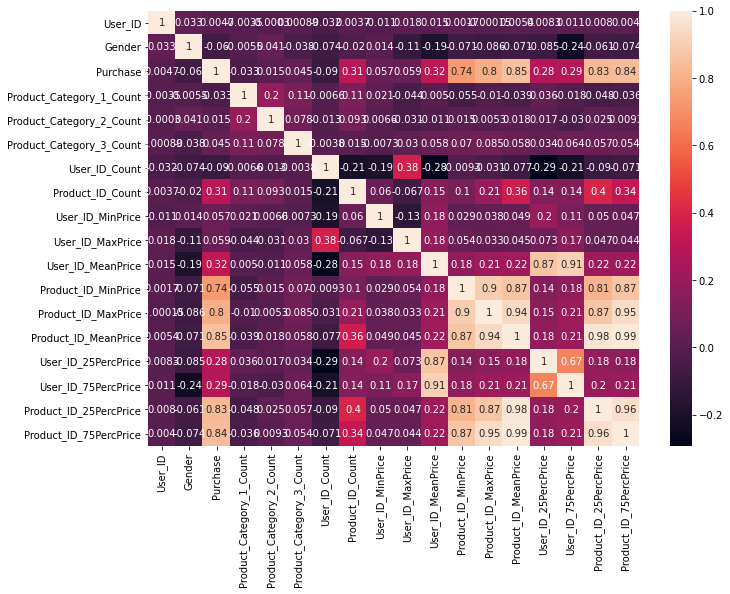

In [26]:
plt.figure(figsize=[11,8])
sns.heatmap(df.corr(),annot=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Stay_In_Current_City_Years']=le.fit_transform(df['Stay_In_Current_City_Years'])
df['City_Category']=le.fit_transform(df['City_Category'])

df['Age']=le.fit_transform(df['Age'])
df['Occupation']=le.fit_transform(df['Occupation'])

In [28]:
df=df.fillna(0)

In [29]:
df['Product_Category_1']=df['Product_Category_1'].astype('int')
df['Product_Category_2']=df['Product_Category_2'].astype('int')
df['Product_Category_3']=df['Product_Category_3'].astype('int')

In [30]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,User_ID_25PercPrice,User_ID_75PercPrice,Product_ID_25PercPrice,Product_ID_75PercPrice
0,1000001,P00069042,1,0,10,0,2,0,3,0,...,612,19219,9545.514286,2648,13716,11870.863436,7884.5,12305.5,10804.00,13475.50
1,1000001,P00248942,1,0,10,0,2,0,1,6,...,612,19219,9545.514286,3880,19701,16304.030981,7884.5,12305.5,15312.00,19264.00
2,1000001,P00087842,1,0,10,0,2,0,12,0,...,612,19219,9545.514286,343,1776,1237.892157,7884.5,12305.5,1043.75,1423.75
3,1000001,P00085442,1,0,10,0,2,0,12,14,...,612,19219,9545.514286,365,1778,1455.140762,7884.5,12305.5,1378.00,1736.00
4,1000002,P00285442,0,6,16,2,4,0,8,0,...,119,20657,10525.610390,3920,10073,7692.763547,7818.0,11973.0,6174.50,8082.50


In [31]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase',
       'Product_Category_1_Count', 'Product_Category_2_Count',
       'Product_Category_3_Count', 'User_ID_Count', 'Product_ID_Count',
       'User_ID_MinPrice', 'User_ID_MaxPrice', 'User_ID_MeanPrice',
       'Product_ID_MinPrice', 'Product_ID_MaxPrice', 'Product_ID_MeanPrice',
       'User_ID_25PercPrice', 'User_ID_75PercPrice', 'Product_ID_25PercPrice',
       'Product_ID_75PercPrice'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int32  
 4   Occupation                  550068 non-null  int32  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int32  
 9   Product_Category_2          550068 non-null  int32  
 10  Product_Category_3          550068 non-null  int32  
 11  Purchase                    550068 non-null  int64  
 12  Product_Category_1_Count    550068 non-null  int64  
 13  Product_Catego

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(1, 0, 'User_ID'),
  Text(2, 0, 'Gender'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'Occupation'),
  Text(5, 0, 'City_Category'),
  Text(6, 0, 'Stay_In_Current_City_Years'),
  Text(7, 0, 'Marital_Status'),
  Text(8, 0, 'Product_Category_1'),
  Text(9, 0, 'Product_Category_2'),
  Text(10, 0, 'Product_Category_3'),
  Text(11, 0, 'Purchase'),
  Text(12, 0, 'Product_Category_1_Count'),
  Text(13, 0, 'Product_Category_2_Count'),
  Text(14, 0, 'Product_Category_3_Count'),
  Text(15, 0, 'User_ID_Count'),
  Text(16, 0, 'Product_ID_Count'),
  Text(17, 0, 'User_ID_MinPrice'),
  Text(18, 0, 'User_ID_MaxPrice'),
  Text(19, 0, 'User_ID_MeanPrice'),
  Text(20, 0, 'Product_ID_MinPrice'),
  Text(21, 0, 'Product_ID_MaxPrice'),
  Text(22, 0, 'Product_ID_MeanPrice'),
  Text(23, 0, 'User_ID_25PercPrice'),
  Text(24, 0, 'User_ID_75PercPrice'),
  Text(25, 0, 'Product_ID_25PercPrice'),
  T

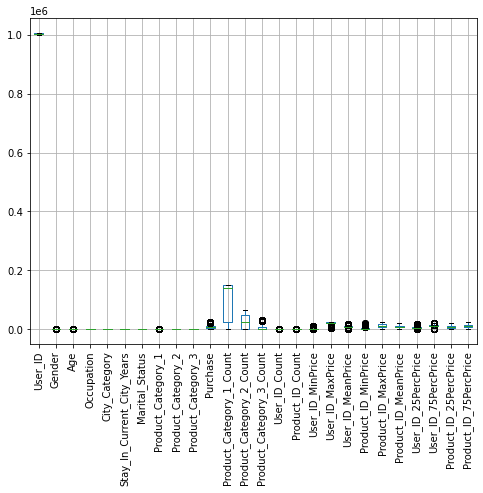

In [33]:
plt.figure(figsize=[8,6])
df.boxplot()
plt.xticks(rotation=90)

<AxesSubplot:>

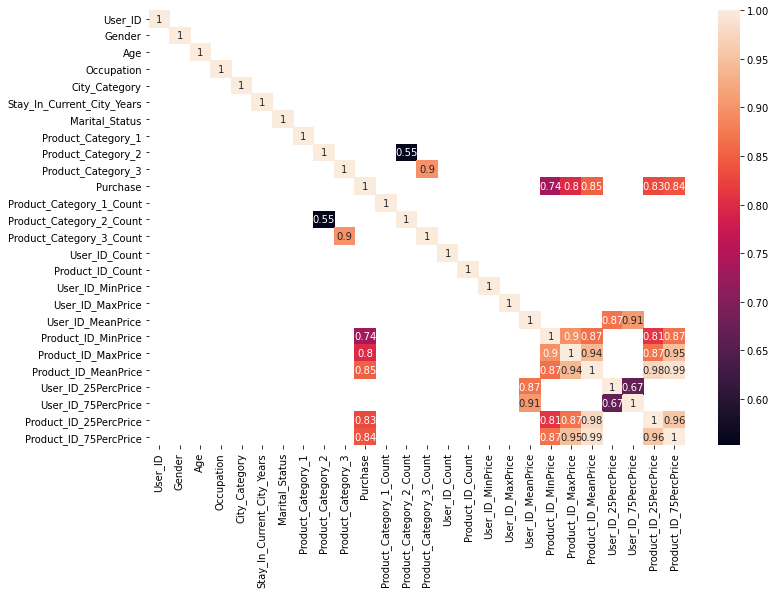

In [34]:
plt.figure(figsize=[12,8])
sns.heatmap(df.corr()[df.corr()>0.5],annot=True)

In [35]:
X=df.drop(['Purchase','User_ID','Product_ID'],axis=1)
y=df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [36]:
X_train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_Category_1_Count,...,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,User_ID_25PercPrice,User_ID_75PercPrice,Product_ID_25PercPrice,Product_ID_75PercPrice
508812,0,5,15,1,1,1,2,0,0,23864,...,934,23083,10523.298507,6390,16477,13236.070588,7157.75,15032.00,10766.50,16007.00
417315,0,3,1,2,4,0,1,2,14,140378,...,238,23781,10351.046512,3811,19671,10203.065327,7863.00,11715.00,7817.00,12018.00
156569,1,1,3,2,1,0,1,5,14,140378,...,24,18991,7992.125000,3795,19689,10723.710526,5293.00,8821.00,7699.50,15399.25
541086,0,2,7,2,0,1,1,2,0,140378,...,937,20677,11496.835165,3841,19703,13037.956863,7881.00,15513.50,11518.50,15621.50
292192,1,1,4,0,2,0,4,8,0,11753,...,594,20652,8661.698113,753,3556,2620.724868,5927.00,10063.00,2122.00,2866.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299741,0,2,3,2,3,0,3,4,0,20213,...,579,21563,10508.666667,2670,13610,8530.222222,7025.00,15470.25,7963.00,10714.00
533660,0,2,0,1,4,0,5,0,0,150933,...,38,23252,8516.997608,1737,8871,4812.991379,5315.25,11581.75,3568.75,6854.50
105595,0,3,7,1,2,0,3,5,0,20213,...,204,23648,7845.850649,3077,13714,11746.665354,4082.00,11496.75,10731.25,13493.25
443712,1,4,1,1,4,1,8,0,0,113925,...,607,16224,6741.359712,2019,10076,7327.332192,5223.00,8032.00,6064.25,8083.75


from sklearn.preprocessing import PowerTransformer
sc=PowerTransformer()

X_train.loc[:,['Product_Category_1', 'Product_Category_2']]=sc.fit_transform(X_train.loc[:,['Product_Category_1','Product_Category_2']])

#from sklearn.impute import KNNImputer
#X_train_impute=pd.DataFrame(knn.fit_transform(X_train),columns=X_train.columns)
#X_test_impute=pd.DataFrame(knn.transform(X_test),columns=X_test.columns)
X_train_impute=X_train
X_test_impute=X_test

X_train_scaled=pd.DataFrame(sc.fit_transform(X_train_impute),columns=X_train_impute.columns)
X_test_scaled=pd.DataFrame(sc.transform(X_test_impute),columns=X_test_impute.columns)

In [37]:
X_train_scaled=X_train
X_test_scaled=X_test

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

LR=LinearRegression()
lr_model=LR.fit(X_train_scaled,y_train)
y_pred=lr_model.predict(X_test_scaled)

print('mean squared error ', mean_squared_error(y_test,y_pred))

print('root mean square error ',np.sqrt(mean_squared_error(y_test,y_pred)))

print('Adusted r square ',r2_score(y_test,y_pred))

mean squared error  6514342.002615809
root mean square error  2552.3209051010435
Adusted r square  0.741734986173403


In [40]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor(random_state=10)

dtc_model=dtc.fit(X_train_scaled,y_train)
y_pred_dtc=dtc_model.predict(X_test_scaled)
print('mean squared error ', mean_squared_error(y_test,y_pred_dtc))

print('root mean square error ',np.sqrt(mean_squared_error(y_test,y_pred_dtc)))
print('Adusted r square ',r2_score(y_test,y_pred_dtc))

mean squared error  12105934.447397605
root mean square error  3479.358338458056
Adusted r square  0.5200529345580003


import numpy as np
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import r2_score
import parfit.parfit as pf

paramGrid = ParameterGrid({
    'min_samples_leaf': [1,3,5,10,15,25,50,100,125,150,175,200],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6, 0.7],
    'random_state': [10]
})
best_model, best_score, all_models, all_scores = pf.bestFit(DecisionTreeRegressor, paramGrid, 
     X_train_scaled, y_train, X_test_scaled, y_test, 
     metric=r2_score, scoreLabel='r2')

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor(min_samples_leaf=250,max_features=0.7,random_state=10)

dtc_model=dtc.fit(X_train_scaled,y_train)
y_pred_dtc1=dtc_model.predict(X_test_scaled)
print('mean squared error ', mean_squared_error(y_test,y_pred_dtc1))

print('root mean square error ',np.sqrt(mean_squared_error(y_test,y_pred_dtc1)))

print('Adusted r square ',r2_score(y_test,y_pred_dtc1))

mean squared error  6303882.747110828
root mean square error  2510.7534222043446
Adusted r square  0.7500787701674125


In [44]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor(min_samples_leaf=300,max_features=0.7,random_state=10)

dtc_model=dtc.fit(X_train_scaled,y_train)
y_pred_dtc1=dtc_model.predict(X_test_scaled)
print('mean squared error ', mean_squared_error(y_test,y_pred_dtc1))

print('root mean square error ',np.sqrt(mean_squared_error(y_test,y_pred_dtc1)))

print('Adusted r square ',r2_score(y_test,y_pred_dtc1))

mean squared error  6314974.104295133
root mean square error  2512.961222202828
Adusted r square  0.7496390466288864


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=10)

rfr_model=rfr.fit(X_train_scaled,y_train)
y_pred_rfr=rfr_model.predict(X_test_scaled)

print('mean squared error ', mean_squared_error(y_test,y_pred_rfr))
print('root mean square error ',np.sqrt(mean_squared_error(y_test,y_pred_rfr)))
print('Adusted r square ',r2_score(y_test,y_pred_rfr))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
bgr=GradientBoostingRegressor(random_state=10)

gbr_model=bgr.fit(X_train_scaled,y_train)
y_pred_gbr=gbr_model.predict(X_test_scaled)
print('mean squared error ', mean_squared_error(y_test,y_pred_gbr))
print('root mean square error ',np.sqrt(mean_squared_error(y_test,y_pred_gbr)))
print('Adusted r square ',r2_score(y_test,y_pred_gbr))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
bgr=GradientBoostingRegressor(n_estimators=150,max_depth=2,random_state=10,learning_rate=0.15)

gbr_model=bgr.fit(X_train_scaled,y_train)
y_pred_gbr=gbr_model.predict(X_test_scaled)
print('mean squared error ', mean_squared_error(y_test,y_pred_gbr))
print('root mean square error ',np.sqrt(mean_squared_error(y_test,y_pred_gbr)))
print('Adusted r square ',r2_score(y_test,y_pred_gbr))

In [47]:
from sklearn.metrics import r2_score,mean_squared_error
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb_model=xgb.fit(X_train,y_train)

y_pred_xgb=xgb_model.predict(X_test)
print('mean squared error ', mean_squared_error(y_test,y_pred_xgb))
print('root mean square error ',np.sqrt(mean_squared_error(y_test,y_pred_xgb)))
print('Adusted r square ',r2_score(y_test,y_pred_xgb))

mean squared error  5891594.642618612
root mean square error  2427.2607281910637
Adusted r square  0.766424180488895


In [48]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators=250)
xgb_model=xgb.fit(X_train,y_train)

y_pred_xgb=xgb_model.predict(X_test)
print('mean squared error ', mean_squared_error(y_test,y_pred_xgb))
print('root mean square error ',np.sqrt(mean_squared_error(y_test,y_pred_xgb)))
print('Adusted r square ',r2_score(y_test,y_pred_xgb))

mean squared error  5846656.303994096
root mean square error  2417.986001612519
Adusted r square  0.7682057880006814


In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
X_train.shape

# test 

In [49]:
test=pd.read_csv('C:/Users/Naman/Downloads/naman python/ana lytics/loan prediction/Black Friday Sales/test.csv')
test.head(2)   

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN


In [50]:
test['Marital_Status']=test['Marital_Status'].astype('object')
test['Occupation']=test['Occupation'].astype('object')
test['Product_Category_1']=test['Product_Category_1'].astype('object')
test['Product_Category_2']=test['Product_Category_2'].astype('object')
test['Product_Category_3']=test['Product_Category_3'].astype('object')

In [51]:
df["Product_Category_1_Count"] = df.groupby(['Product_Category_1'])['Product_Category_1'].transform('count')
pc1_count_dict = df.groupby(['Product_Category_1']).size().to_dict()
test['Product_Category_1_Count'] = test['Product_Category_1'].apply(lambda x:pc1_count_dict.get(x,0))

df["Product_Category_2_Count"] = df.groupby(['Product_Category_2'])['Product_Category_2'].transform('count')
pc2_count_dict = df.groupby(['Product_Category_2']).size().to_dict()
test['Product_Category_2_Count'] = test['Product_Category_2'].apply(lambda x:pc2_count_dict.get(x,0))

df["Product_Category_3_Count"] = df.groupby(['Product_Category_3'])['Product_Category_3'].transform('count')
pc3_count_dict = df.groupby(['Product_Category_3']).size().to_dict()
test['Product_Category_3_Count'] = test['Product_Category_3'].apply(lambda x:pc3_count_dict.get(x,0))

df["User_ID_Count"] = df.groupby(['User_ID'])['User_ID'].transform('count')
userID_count_dict = df.groupby(['User_ID']).size().to_dict()
test['User_ID_Count'] = test['User_ID'].apply(lambda x:userID_count_dict.get(x,0))

df["Product_ID_Count"] = df.groupby(['Product_ID'])['Product_ID'].transform('count')
productID_count_dict = df.groupby(['Product_ID']).size().to_dict()
test['Product_ID_Count'] = test['Product_ID'].apply(lambda x:productID_count_dict.get(x,0))

In [52]:
df["User_ID_MinPrice"] = df.groupby(['User_ID'])['Purchase'].transform('min')
userID_min_dict = df.groupby(['User_ID'])['Purchase'].min().to_dict()
test['User_ID_MinPrice'] = test['User_ID'].apply(lambda x:userID_min_dict.get(x,0))

df["User_ID_MaxPrice"] = df.groupby(['User_ID'])['Purchase'].transform('max')
userID_max_dict = df.groupby(['User_ID'])['Purchase'].max().to_dict()
test['User_ID_MaxPrice'] = test['User_ID'].apply(lambda x:userID_max_dict.get(x,0))

df["User_ID_MeanPrice"] = df.groupby(['User_ID'])['Purchase'].transform('mean')
userID_mean_dict = df.groupby(['User_ID'])['Purchase'].mean().to_dict()
test['User_ID_MeanPrice'] = test['User_ID'].apply(lambda x:userID_mean_dict.get(x,0))


df["Product_ID_MinPrice"] = df.groupby(['Product_ID'])['Purchase'].transform('min')
productID_min_dict = df.groupby(['Product_ID'])['Purchase'].min().to_dict()
test['Product_ID_MinPrice'] = test['Product_ID'].apply(lambda x:productID_min_dict.get(x,0))

df["Product_ID_MaxPrice"] = df.groupby(['Product_ID'])['Purchase'].transform('max')
productID_max_dict = df.groupby(['Product_ID'])['Purchase'].max().to_dict()
test['Product_ID_MaxPrice'] = test['Product_ID'].apply(lambda x:productID_max_dict.get(x,0))

df["Product_ID_MeanPrice"] = df.groupby(['Product_ID'])['Purchase'].transform('mean')
productID_mean_dict = df.groupby(['Product_ID'])['Purchase'].mean().to_dict()
test['Product_ID_MeanPrice'] = test['Product_ID'].apply(lambda x:productID_mean_dict.get(x,0))

In [53]:
userID_25p_dict = df.groupby(['User_ID'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
df['User_ID_25PercPrice'] = df['User_ID'].apply(lambda x:userID_25p_dict.get(x,0))
test['User_ID_25PercPrice'] = test['User_ID'].apply(lambda x:userID_25p_dict.get(x,0))

userID_75p_dict = df.groupby(['User_ID'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
df['User_ID_75PercPrice'] = df['User_ID'].apply(lambda x:userID_75p_dict.get(x,0))
test['User_ID_75PercPrice'] = test['User_ID'].apply(lambda x:userID_75p_dict.get(x,0))

productID_25p_dict = df.groupby(['Product_ID'])['Purchase'].apply(lambda x:np.percentile(x,25)).to_dict()
df['Product_ID_25PercPrice'] = df['Product_ID'].apply(lambda x:productID_25p_dict.get(x,0))
test['Product_ID_25PercPrice'] = test['Product_ID'].apply(lambda x:productID_25p_dict.get(x,0))

productID_75p_dict = df.groupby(['Product_ID'])['Purchase'].apply(lambda x:np.percentile(x,75)).to_dict()
df['Product_ID_75PercPrice'] = df['Product_ID'].apply(lambda x:productID_75p_dict.get(x,0))
test['Product_ID_75PercPrice'] = test['Product_ID'].apply(lambda x:productID_75p_dict.get(x,0))

In [54]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
Product_Category_1_Count           0
Product_Category_2_Count           0
Product_Category_3_Count           0
User_ID_Count                      0
Product_ID_Count                   0
User_ID_MinPrice                   0
User_ID_MaxPrice                   0
User_ID_MeanPrice                  0
Product_ID_MinPrice                0
Product_ID_MaxPrice                0
Product_ID_MeanPrice               0
User_ID_25PercPrice                0
User_ID_75PercPrice                0
Product_ID_25PercPrice             0
Product_ID_75PercPrice             0
dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

test['Gender']=test['Gender'].replace({'M':0,'F':1})
test['City_Category']=le.fit_transform(test['City_Category'])
test['Stay_In_Current_City_Years']=le.fit_transform(test['Stay_In_Current_City_Years'])
test['Age']=le.fit_transform(test['Age'])
test['Occupation']=le.fit_transform(test['Occupation'])

test=test.fillna(0)

test['Product_ID']=test['Product_ID'].astype('object')

test['Product_Category_1']=test['Product_Category_1'].astype('int')
test['Product_Category_2']=test['Product_Category_2'].astype('int')
test['Product_Category_3']=test['Product_Category_3'].astype('int')

In [56]:
test=test.drop(['User_ID','Product_ID'],axis=1)

In [57]:
test.shape

(233599, 24)

In [58]:
test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_Category_1_Count,...,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice,User_ID_25PercPrice,User_ID_75PercPrice,Product_ID_25PercPrice,Product_ID_75PercPrice
0,0,4,7,1,2,1,1,11,0,140378,...,481,19693,14747.714286,3933,19708,15781.118590,15488.50,19087.0,12067.50,19248.50
1,0,2,17,2,0,0,3,5,0,20213,...,139,20278,10243.086207,3077,13714,11746.665354,6160.75,14720.5,10731.25,13493.25
2,1,3,1,1,4,1,5,14,0,150933,...,24,20957,9728.744395,1734,8900,5731.338028,6932.50,12845.5,5147.00,7027.00
3,1,3,1,1,4,1,4,9,0,11753,...,24,20957,9728.744395,813,3526,1943.266667,6932.50,12845.5,1459.00,2129.50
4,1,2,1,2,1,0,4,5,12,11753,...,121,20175,7957.471429,684,3556,2585.590829,5248.50,9784.5,2115.00,3421.50


In [59]:
xgb=XGBRegressor(n_estimators=250)
xgb_model=xgb.fit(X_train,y_train)

y_pred_xgb_final=xgb_model.predict(test)

test['Purchase']=y_pred_xgb_final

final_pred1= pd.DataFrame({
               'Product_ID':test.index,'Purchase':test['Purchase']})

final_pred1.to_csv('Blac_friday_sales_prediction_7.csv')